### BeautifulSoup
    BeautifulSoup은 HTML과 XML문서를 파싱하기 위한 파이썬 라이브러리 BeautifulSoup parser를 사용해서
    html 문서내 태그를 구조화 하고 파이썬 객체로 만들어서 원하는 태그를 찾을 수 있도록 도와준다.
    
    BeautifulSoup 라이브러리는 외부 라이브러리 이기 때문에 사용하기 위해서는 설치부터 해야한다.(아나콘다는 이미 설치되어 있음)
    -pip install bs4
    BeautifulSoup 인터넷 홈페이지 내용을 가지고 오는 모듈이 아니라
    홈페이지 내용을 구조화해서 가져오는 모듈

In [6]:
!pip install beautifulsoup4

### 1. 네이버 URL 정보를 가져옴 - requests.get()

In [12]:
import requests
from bs4 import BeautifulSoup

req = requests.get("http://naver.com") #네이버 url 정보를 가져온다.
html = req.text

soup = BeautifulSoup(html,'html.parser') # BeautifulSoup을 이용해서 html를 이용해서 parser 파싱한 
# print(soup.prettify())

### 3. Beautifulsoup find(), find_all()

In [15]:
result = soup.find_all('a','thumb') #a태그와 특정 클래스 등을 참조한다.
#result

news_list = []
for i in result:
    news_list.append(i.find('img')['alt']) #img태그 안에 있는 alt 속성의 값을 추가
print(news_list)
    

['아시아경제', '스포츠조선', '아이뉴스24', '조선일보', '스포츠서울', '조선비즈', '노컷뉴스', '국민일보', '매일경제', '뉴데일리', '연합뉴스TV', '서울신문', '코리아헤럴드', '스포탈코리아', '헤럴드경제', '과학동아', 'KBC광주방송', '미디어SR', '한경잡앤조이', 'SBS연예뉴스', '한국금융신문', '이로운넷', '매경이코노미', '독서신문']


In [23]:
# BeautifulSoup이 가지고 있는 특정 함수들...
soup.title
soup.title.name
soup.title.string

# 태그가 여러개 있더라도 항상 첫번째 태그만 가져와서 검색한다....주의
soup.img
# soup.img['alt']
#soup.img['class'] class 속성이 첫번째 img 태그에는 없기 때문에 에러난다.
soup.img['height']

import re #정규식 표현관련 모듈...특정 단어가 얼마나 들어있는지 확인
print(soup.find_all(string=re.compile("네이버")))


['네이버', '네이버를 시작페이지로', '쥬니어네이버', '네이버뉴스', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', "[안내] '온라인 공연' '공연 예매순위'도 이제 네이버에서 검색해 보세요.", '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


### BeautifulSoup의 select_one(),select()
    find(), find_all() ----- 태그 기반 검색
    select_one(), select() ---- 선택자 기반 검색
    

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>, <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>, <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>, <a href="#account"><span>로그인 바로가기</span></a>, <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/details/darkmode?=main&amp;wpid=RydDy7"></a>, <a class="_2aeXMlrb" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #7c56d5">다운로드</span></a>, <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>, <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>, <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>, 
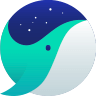
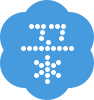

In [25]:
'''
이 부분만 보면 find(), find_all() 함수와 별다른 차이범이 없어보인다.
조금 더 아래 예제를 해보자
'''

print(soup.select_one('a')) # a태그 하나만 가져옴
print(soup.select('a')) # a태그 다 가져옴

In [28]:
# css 선택자 사용하는 기법 그래도 사용한다.
body = soup.select('body a')
#body

ul = soup.select('div>ul')
ul

[<ul class="kwd_lst _recent">
 <!-- 최근검색어 템플릿 -->
 <!-- [AU] _item 클래스를 추가해주세요. -->
 <!-- [AU] data-template-type="history" data-keyword="@in_txt@" attribute를 추가해주세요. -->
 <li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="history">
 <a class="kwd" href="#">
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>
 </a>
 <span class="etc">
 <em class="date">@date@.</em>
 <!-- [AU] _del 클래스를 추가해주세요. -->
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>
 </span>
 </li>
 </ul>,
 <ul class="kwd_lst _kwd_list">
 <!-- [AU] 자동완성 검색어 템플릿 -->
 <!-- [AU] _item 클래스를 추가해주세요. -->
 <!-- [AU] data-rank="@rank@" data-template-type="suggestion" data-keyword="@in_txt@" attribute를 추가해주세요. -->
 <li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="suggestion">
 <a class="kwd" href="#">
 <span class="fix"><span class="common_ico_kwd"

### BeautlfulSoup get_text(),get()
    get_text() ---- 검색결과에서 태그를 제외한 텍스트만 가져옴
    get('속성') ---- 해당 속성의 값만 가져옴
    string ---- 검색결과에서 태그안의 또 다른 태그가 없는 경우에만 내용 출력
    

In [31]:
text = soup.find('span', attrs= {'class':'blind'})
text
text.get_text()
text.get('class')


['blind']

### BeautlfulSoup 사용해서 네이버 영화 랭킹 가져오기
    1. 네이버 영화 랭킹 홈페이지 접속 url, text 가져오기
        https://movie.naver.com/movie/sdb/rank/rmovie.nhn
    2. 분석 작업을 하기 위해서 BeautifulSoup을 만들고 html 파서로 파싱
        
    3. 리턴된 soup객체를 분석한 결과로 영화랭킹을 찾아서 출력
       select(), find_all

In [33]:
import requests
from bs4 import BeautifulSoup

In [34]:
# 1.특정 사이트 url받아와서 ...requests.get('')
req = requests.get("https://movie.naver.com/movie/sdb/rank/rmovie.nhn")
html = req.text

# 2. 분석작업을 하기 위해서 bs생성
soup = BeautifulSoup(html,'html.parser') # BeautifulSoup을 이용해서 html를 이용해서 parser 파싱한 



In [35]:
# 3. soup 객체를 분석해서 영화랭킹을 찾아본다.(영화랭킹 태그가 어떤 구조로.....)

'''
영화랭킹 태그 구조는
div 태그의 클래스 속성의 값이 tit3
    a 태그들이 계속 반복되는 구조...
'''

movie_ranking_list = soup.find_all('div', class_='tit3')

for i in range(len(movie_ranking_list)):
        print("{:2}위 :{}".format(i+1, movie_ranking_list[i].get_text().strip()))

 1위 :스파이럴
 2위 :더 스파이
 3위 :분노의 질주: 더 얼티메이트
 4위 :크루즈 패밀리: 뉴 에이지
 5위 :비와 당신의 이야기
 6위 :극장판 귀멸의 칼날: 무한열차편
 7위 :내가 죽기를 바라는 자들
 8위 :아들의 이름으로
 9위 :내일의 기억
10위 :미나리
11위 :내겐 너무 소중한 너
12위 :노매드랜드
13위 :보이저스
14위 :명탐정 코난: 비색의 탄환
15위 :자산어보
16위 :링: 더 라스트 챕터
17위 :아이들은 즐겁다
18위 :키퍼스
19위 :어른들은 몰라요
20위 :혼자 사는 사람들
21위 :극장판 콩순이: 장난감나라 대모험
22위 :슈퍼노바
23위 :해리 포터와 아즈카반의 죄수
24위 :도라에몽: 스탠바이미 2
25위 :범털2 : 쩐의 전쟁
26위 :빅 피쉬
27위 :크루엘라
28위 :노바디
29위 :학교 가는 길
30위 :미스
31위 :파이터
32위 :비커밍 아스트리드
33위 :파이프라인
34위 :낙원의 밤
35위 :베놈 2: 렛 데어 비 카니지
36위 :소울
37위 :콰이어트 플레이스 2
38위 :8년을 뛰어넘은 신부
39위 :더 파더
40위 :그린 북
41위 :카오스 워킹
42위 :2067
43위 :잭 스나이더의 저스티스 리그
44위 :블랙 위도우
45위 :500일의 썸머
46위 :모탈 컴뱃
47위 :컨저링 3: 악마가 시켰다
48위 :스쿨 오브 락(樂)
49위 :서복
50위 :고질라 VS. 콩
